In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [15]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [16]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [17]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [20]:
engine.execute("SELECT * FROM Measurement LIMIT 5").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date[0]

'2017-08-23'

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

date = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date == recent_date[0]).all()

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
year_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).all()

#List comprehension solution
rows = [{"Date": data[0], "Prcp": data[1]} for data in year_data] 

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
result = pd.DataFrame(rows).sort_values("Date")#set_index("Date").sort_index()
result


,Date,Prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


In [35]:
#result["Date"] = pd.to_datetime(result["Date"])
#result

,Date,Prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


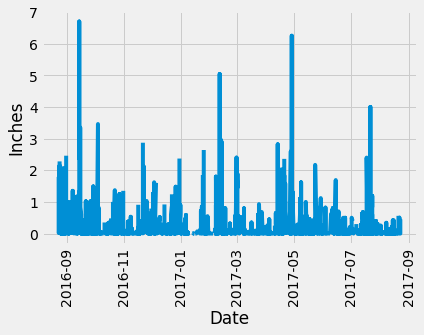

In [46]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(result["Date"], result["Prcp"])
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [59]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(f"the mean is {result['Prcp'].mean()}")
print(f"the median is {result['Prcp'].median()}")
print(f"the mode is {result['Prcp'].mode()}")

the mean is 0.17727857496288899
the median is 0.02
the mode is 0    0.0
dtype: float64


# Exploratory Station Analysis

In [47]:
# Design a query to calculate the total number stations in the dataset
count = session.query(Measurement.station).group_by(Measurement.station).count()
count

9

In [48]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_counts = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()    
station_counts 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# highest
session.query(Measurement.tobs, func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()


[(85.0, 85.0)]

In [50]:
#lowest
session.query(Measurement.tobs, func.min(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()


[(54.0, 54.0)]

In [51]:
#average
session.query(Measurement.tobs, func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

[(70.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

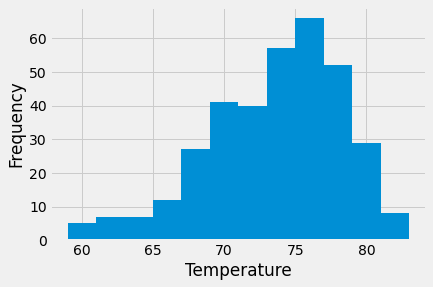

In [52]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tob = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date > year_ago).all()
tobs = [t[0] for t in tob]
plt.hist(tobs, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close session

In [ ]:
# Close Session
session.close()